<a href="https://colab.research.google.com/github/SAPUII/bsc_dpdm22/blob/main/midterm_dpdm22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## การเตรียมข้อมูลประกอบด้วย กำจัด outlier, แก้ missing, normalization, one-hot-encoder และ อื่นๆ ที่นักศึกษาเห็นว่าเหมาะสม

# 1 ทำนายราคาบ้าน 10 คะแนน
เตรียมข้อมูลเพื่อทำนายราคาบ้าน ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price'``` จากตาราง "คำตอบนักประเมิน(ID)"

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 200,500,1000,2000 เมตร (ตั้งชื่อ d200-7/11','d500-7/11',...,'d2000-7/11' แบะ ;d200-school','d500-school',...,'d2000-school')``` จากตาราง "7-eleven.json" และ "school.json"

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

In [ ]:
#นำเข้าเดต้าที่สร้างได้
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/bsc_DPDM_data/MIDterm')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/drive/MyDrive/bsc_DPDM_data/MIDterm


In [ ]:
!ls

 7-eleven.json	      school.json		 'คำตอบนักประเมิน(ID).xlsx'
'Data House.gsheet'   thsarabunnew-webfont.ttf
'Data House.xlsx'    'คำตอบนักประเมิน(ID).gsheet'


In [ ]:
# from google.colab import auth #เชื่อม Colab กับ google sheet
# import gspread
# from google.auth import default
# #autenticating to google
# auth.authenticate_user()
# creds, _ = default()
# gc = gspread.authorize(creds)

In [ ]:
# gsht = gc.open_by_key('1S4plALcSf9CC04oaWc_GMPbMnbrKiG7eZws30Ed4huk')
# worksheet = gsht.worksheet('บ้านมือ2')
# rows = worksheet.get_all_values()
# data_house2 = pd.DataFrame.from_records(rows)
# data_house2.columns = data_house2.iloc[0]
# data_house2 = data_house2.iloc[1:].reset_index().iloc[:,1:]
# data_house2


##บ้านมือ2

###นำเข้าไฟล์

In [ ]:
data_house2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/Data House.xlsx',sheet_name='บ้านมือ2')
data_house2['section_hand'] = 'บ้านมือ2'
data_house2.head()

,id,name_th,name_en,project_name,company,province,district,sub_district,property_type,home improvement,...,building_number,number_of_building,floor_number,parking_percentage,has_pool,has_keycard,has_security,has_fitness,has_garden,section_hand
0,1.0,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านวังเวิน,NaN,ขอนแก่น,ชนบท,ศรีบุญเรือง,บ้านเดี่ยว,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,บ้านมือ2
1,4.0,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านหนองบัวบาน,NaN,ขอนแก่น,น้ำพอง,ทรายมูล,บ้านเดี่ยว,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,บ้านมือ2
2,16.0,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,NaN,NaN,ขอนแก่น,มัญจาคีรี,กุดเค้า,บ้านเดี่ยว,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,บ้านมือ2
3,18.0,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,ชลลดา ขอนแก่น,บริษัท แลนด์แอนด์เฮ้าส์ จำกัด (มหาชน),ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,บ้านมือ2
4,19.0,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,เบสท์โฮม,เบสท์โฮม เลี่ยงเมืองขอนแก่น,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,บ้านมือ2


###เลือกคอลัมน์ที่จะใช้

In [ ]:
data_h2 = data_house2[['id','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price','section_hand','latitude','longitude']]
data_h2

,id,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,section_hand,latitude,longitude
0,1.0,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,244.00,2.0,390000.0,บ้านมือ2,16.139321,102.631587
1,4.0,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,164.00,3.0,820000.0,บ้านมือ2,16.676156,102.917998
2,16.0,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,489.00,9.0,3260000.0,บ้านมือ2,16.129358,102.530670
3,18.0,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.00,2.0,5000000.0,บ้านมือ2,16.459052,102.806404
4,19.0,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,164.00,2.0,3500000.0,บ้านมือ2,16.450000,102.800680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,20460P,no,0.0,0.0,73.0,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,108.76,NaN,437400.0,บ้านมือ2,16.480110,102.574033
1652,20462P,no,0.0,0.0,84.0,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,119.00,NaN,714600.0,บ้านมือ2,16.528551,102.411762
1653,20463P,no,0.0,1.0,45.0,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,188.50,NaN,451000.0,บ้านมือ2,15.867444,102.482085
1654,20466P,no,0.0,1.0,59.0,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,207.00,NaN,910000.0,บ้านมือ2,16.636912,102.105343


###เช็ค missing บ้านมือ2

In [ ]:
data_h2.isnull().any()

id                    False
renovate               True
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story        True
number_of_bedroom      True
number_of_bathroom    False
direction             False
furniture             False
usable_area            True
number_of_parking      True
sell_price             True
section_hand          False
latitude               True
longitude              True
dtype: bool

###fillna and dropna บ้านมือ 2

In [ ]:
data_h2f = data_h2.fillna({'renovate':'no','number_of_parking' : 0,'number_of_bedroom' : 0,'number_of_story' : 0,'usable_area':0 })
#เติม 0 เพราะในไฟล์มันมีค่า 0 และค่าที่ว่างแบบไม่มีอะไรเลย เลยใส่ 0 
# d.dropna(subset=['sell_price'])แบบอาจารย์

In [ ]:
data_h2f.isnull().any()

id                    False
renovate              False
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
direction             False
furniture             False
usable_area           False
number_of_parking     False
sell_price             True
section_hand          False
latitude               True
longitude              True
dtype: bool

In [ ]:
data_h2d = data_h2f.dropna(subset=['sell_price','latitude','longitude'])
data_h2d.head()

,id,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,section_hand,latitude,longitude
0,1.0,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,244.0,2.0,390000.0,บ้านมือ2,16.139321,102.631587
1,4.0,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,164.0,3.0,820000.0,บ้านมือ2,16.676156,102.917998
2,16.0,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,489.0,9.0,3260000.0,บ้านมือ2,16.129358,102.530670
3,18.0,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.0,2.0,5000000.0,บ้านมือ2,16.459052,102.806404
4,19.0,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,164.0,2.0,3500000.0,บ้านมือ2,16.450000,102.800680


In [ ]:
data_h2d.isnull().any()

id                    False
renovate              False
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
direction             False
furniture             False
usable_area           False
number_of_parking     False
sell_price            False
section_hand          False
latitude              False
longitude             False
dtype: bool

##บ้านมือ 1

###นำเข้าไฟล์

In [ ]:
data_house1 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/Data House.xlsx',sheet_name='บ้านมือ1')
data_house1['section_hand'] = 'บ้านมือ1'
data_house1['renovate'] = 'no'
data_house1.head()

,id,parent_id,project_name,province,district,sub_district,zip_code,zone_id,zone,property_type,...,cable_ask,position_previous,position_current,sold_out_at,is_pro_in_house,created_at,updated_at,deleted_at,section_hand,renovate
0,314.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN,บ้านมือ1,no
1,315.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านแฝด,...,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN,บ้านมือ1,no
2,316.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN,บ้านมือ1,no
3,317.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN,บ้านมือ1,no
4,318.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN,บ้านมือ1,no


In [ ]:
data_house1.columns

Index(['id', 'parent_id', 'project_name', 'province', 'district',
       'sub_district', 'zip_code', 'zone_id', 'zone', 'property_type',
       ...
       'cable_ask', 'position_previous', 'position_current', 'sold_out_at',
       'is_pro_in_house', 'created_at', 'updated_at', 'deleted_at',
       'section_hand', 'renovate'],
      dtype='object', length=143)

In [ ]:
data_h1 = data_house1[['id','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price','section_hand','latitude','longitude']]
data_h1

,id,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,section_hand,latitude,longitude
0,314.0,no,NaN,NaN,50.00,2.0,4.0,3.0,0.0,0.0,185.0,2.0,3950000.0,บ้านมือ1,16.392304,102.827926
1,315.0,no,NaN,NaN,40.00,2.0,4.0,3.0,0.0,0.0,165.0,2.0,3250000.0,บ้านมือ1,16.392304,102.827926
2,316.0,no,NaN,NaN,77.25,2.0,4.0,3.0,0.0,0.0,260.0,2.0,6300000.0,บ้านมือ1,16.392304,102.827926
3,317.0,no,NaN,NaN,81.25,2.0,6.0,5.0,0.0,0.0,343.0,3.0,6900000.0,บ้านมือ1,16.392304,102.827926
4,318.0,no,NaN,NaN,55.00,2.0,4.0,4.0,0.0,0.0,223.0,2.0,4490000.0,บ้านมือ1,16.392304,102.827926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,62204519412ede001495e6cb,no,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,125.0,2.0,2290000.0,บ้านมือ1,102.875722,16.484111
750,62201e6fa441d30014e1f350,no,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,70.0,2.0,2590000.0,บ้านมือ1,102.850706,16.410972
751,5fa0e476a3326800191e29ea,no,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,120.0,2.0,1990000.0,บ้านมือ1,102.614819,15.828671
752,5e9d6fa69f161600121b61b2,no,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,100.0,2.0,1990000.0,บ้านมือ1,102.402141,15.808013


###เช็ค missing บ้านมือ1

In [ ]:
data_h1.isnull().any()

id                    False
renovate              False
number_of_rai          True
number_of_ngan         True
number_of_va           True
number_of_story        True
number_of_bedroom      True
number_of_bathroom     True
direction              True
furniture              True
usable_area            True
number_of_parking      True
sell_price             True
section_hand          False
latitude               True
longitude              True
dtype: bool

###fillna and dropna บ้านมือ 1

In [ ]:
data_h1f=data_h1.fillna({'number_of_rai':0,'number_of_ngan':0,'number_of_va': 0,'number_of_story' : 0,'number_of_bedroom':0,'number_of_bathroom':0,'usable_area':0,'direction':'ไม่ระบุ','furniture':'ไม่มี' ,'number_of_parking':0 })
data_h1f

,id,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,section_hand,latitude,longitude
0,314.0,no,0.0,0.0,50.00,2.0,4.0,3.0,0.0,0.0,185.0,2.0,3950000.0,บ้านมือ1,16.392304,102.827926
1,315.0,no,0.0,0.0,40.00,2.0,4.0,3.0,0.0,0.0,165.0,2.0,3250000.0,บ้านมือ1,16.392304,102.827926
2,316.0,no,0.0,0.0,77.25,2.0,4.0,3.0,0.0,0.0,260.0,2.0,6300000.0,บ้านมือ1,16.392304,102.827926
3,317.0,no,0.0,0.0,81.25,2.0,6.0,5.0,0.0,0.0,343.0,3.0,6900000.0,บ้านมือ1,16.392304,102.827926
4,318.0,no,0.0,0.0,55.00,2.0,4.0,4.0,0.0,0.0,223.0,2.0,4490000.0,บ้านมือ1,16.392304,102.827926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,62204519412ede001495e6cb,no,0.0,0.0,0.00,1.0,3.0,2.0,ไม่ระบุ,ไม่มี,125.0,2.0,2290000.0,บ้านมือ1,102.875722,16.484111
750,62201e6fa441d30014e1f350,no,0.0,0.0,0.00,1.0,3.0,2.0,ไม่ระบุ,ไม่มี,70.0,2.0,2590000.0,บ้านมือ1,102.850706,16.410972
751,5fa0e476a3326800191e29ea,no,0.0,0.0,0.00,1.0,3.0,2.0,ไม่ระบุ,ไม่มี,120.0,2.0,1990000.0,บ้านมือ1,102.614819,15.828671
752,5e9d6fa69f161600121b61b2,no,0.0,0.0,0.00,1.0,3.0,2.0,ไม่ระบุ,ไม่มี,100.0,2.0,1990000.0,บ้านมือ1,102.402141,15.808013


In [ ]:
data_h1d = data_h1f.dropna(subset=['sell_price','latitude','longitude'])
data_h1d.head()

,id,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,section_hand,latitude,longitude
0,314.0,no,0.0,0.0,50.00,2.0,4.0,3.0,0.0,0.0,185.0,2.0,3950000.0,บ้านมือ1,16.392304,102.827926
1,315.0,no,0.0,0.0,40.00,2.0,4.0,3.0,0.0,0.0,165.0,2.0,3250000.0,บ้านมือ1,16.392304,102.827926
2,316.0,no,0.0,0.0,77.25,2.0,4.0,3.0,0.0,0.0,260.0,2.0,6300000.0,บ้านมือ1,16.392304,102.827926
3,317.0,no,0.0,0.0,81.25,2.0,6.0,5.0,0.0,0.0,343.0,3.0,6900000.0,บ้านมือ1,16.392304,102.827926
4,318.0,no,0.0,0.0,55.00,2.0,4.0,4.0,0.0,0.0,223.0,2.0,4490000.0,บ้านมือ1,16.392304,102.827926


In [ ]:
data_h1d.isnull().any()

id                    False
renovate              False
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
direction             False
furniture             False
usable_area           False
number_of_parking     False
sell_price            False
section_hand          False
latitude              False
longitude             False
dtype: bool

##รวมบ้านมือ2 กับ บ้านมือ1

In [ ]:
all_house = pd.concat([data_h2d,data_h1d])
all_house

,id,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,section_hand,latitude,longitude
0,1.0,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,244.0,2.0,390000.0,บ้านมือ2,16.139321,102.631587
1,4.0,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,164.0,3.0,820000.0,บ้านมือ2,16.676156,102.917998
2,16.0,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,489.0,9.0,3260000.0,บ้านมือ2,16.129358,102.530670
3,18.0,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.0,2.0,5000000.0,บ้านมือ2,16.459052,102.806404
4,19.0,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,164.0,2.0,3500000.0,บ้านมือ2,16.450000,102.800680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,62204519412ede001495e6cb,no,0.0,0.0,0.0,1.0,3.0,2.0,ไม่ระบุ,ไม่มี,125.0,2.0,2290000.0,บ้านมือ1,102.875722,16.484111
750,62201e6fa441d30014e1f350,no,0.0,0.0,0.0,1.0,3.0,2.0,ไม่ระบุ,ไม่มี,70.0,2.0,2590000.0,บ้านมือ1,102.850706,16.410972
751,5fa0e476a3326800191e29ea,no,0.0,0.0,0.0,1.0,3.0,2.0,ไม่ระบุ,ไม่มี,120.0,2.0,1990000.0,บ้านมือ1,102.614819,15.828671
752,5e9d6fa69f161600121b61b2,no,0.0,0.0,0.0,1.0,3.0,2.0,ไม่ระบุ,ไม่มี,100.0,2.0,1990000.0,บ้านมือ1,102.402141,15.808013


In [ ]:
all_house.dtypes

id                     object
renovate               object
number_of_rai         float64
number_of_ngan        float64
number_of_va          float64
number_of_story       float64
number_of_bedroom     float64
number_of_bathroom    float64
direction              object
furniture              object
usable_area           float64
number_of_parking     float64
sell_price            float64
section_hand           object
latitude              float64
longitude             float64
dtype: object

In [ ]:
all_house.isnull().any()

id                    False
renovate              False
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
direction             False
furniture             False
usable_area           False
number_of_parking     False
sell_price            False
section_hand          False
latitude              False
longitude             False
dtype: bool

##คำตอบนักประเมิน(ID)

In [ ]:
from google.colab import auth #เชื่อม Colab กับ google sheet
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('คำตอบนักประเมิน(ID)').sheet1 # import google sheet
rows = worksheet.get_all_values()
data_id = pd.DataFrame(rows) #data ID ผู้ประเมิน
data_id


,0,1,2,3,4,5,6,7,8,9
0,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
1,1,https://nayoo.co/khonkaen/posts/25,25,บ้านเดี่ยว,มั่นใจ,"2,890,000","2,500,000","5,000-15,000",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,2,https://nayoo.co/khonkaen/posts/25,25,บ้านเดี่ยว,มั่นใจ,"2,890,000","2,700,000","โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,1,https://nayoo.co/khonkaen/posts/33,33,บ้านเดี่ยว,มั่นใจ,"2,600,000","2,200,000","5,000-15,000",,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/33,33,บ้านเดี่ยว,มั่นใจ,"2,600,000","2,400,000","ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...,...
1913,2,https://nayoo.co/khonkaen/posts/17867,17867,บ้านเดี่ยว,มั่นใจ,"965,000","550,000","ราคาเสนอขาย 2,000 - 3,000 บาท/ตารางวา",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1914,2,https://nayoo.co/khonkaen/posts/17873,17873,บ้านเดี่ยว,มั่นใจ,"1,000,000","1,000,000","ราคาเสนอขาย 2,500 - 3,000 บาท/ตารางวา",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1915,2,https://nayoo.co/khonkaen/posts/17874,17874,บ้านเดี่ยว,มั่นใจ,"10,873,000","10,000,000","ราคาเสนอขาย 12,000 - 15,000 บาท/ตารางวา",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1916,2,https://nayoo.co/khonkaen/posts/17876,17876,บ้านเดี่ยว,มั่นใจ,"1,000,000","1,200,000",ราคาเสนอขาย 1.2-1.5 ล้านบาท/หลัง,,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [ ]:
data_id = data_id.rename(columns=data_id.iloc[0]) # เปบี่ยนชื่อคอลัมน์เฉยๆ 
data_id = data_id.iloc[1:] # ลบ row 0 
data_id = data_id.reset_index() 
del data_id['index']

In [ ]:
data_id.isnull().values.any()

False

In [ ]:
data_id[data_id['ID ผู้ประเมิน']=='1']

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,25,บ้านเดี่ยว,มั่นใจ,"2,890,000","2,500,000","5,000-15,000",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,33,บ้านเดี่ยว,มั่นใจ,"2,600,000","2,200,000","5,000-15,000",,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,495,บ้านเดี่ยว,มั่นใจ,"6,050,000","5,000,000","5,000-15,000",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,564,บ้านเดี่ยว,มั่นใจ,"4,400,000","3,500,000","5,000-18,000",,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,566,บ้านเดี่ยว,มั่นใจ,"2,750,000","2,500,000","5,000-25,000",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...,...
1862,1,https://www.baania.com/listing/%E0%B8%82%E0%B8...,30327P,บ้านเดี่ยว,มั่นใจ,"4,950,000","4,500,000",เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1863,1,https://www.baania.com/listing/%E0%B8%82%E0%B8...,30328P,บ้านเดี่ยว,มั่นใจ,"3,950,000","3,500,000",เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1864,1,https://www.baania.com/listing/%E0%B8%82%E0%B8...,30330P,บ้านเดี่ยว,มั่นใจ,"1,700,000","1,800,000",เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1865,1,https://www.baania.com/listing/%E0%B8%82%E0%B8...,30331P,บ้านเดี่ยว,มั่นใจ,"5,900,000","5,500,000",เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


###นำเข้าไฟล์แบบที่ 2 
เพราะแบบเเรกเช็ค missing แล้วมันไม่ขึ้นทั้งๆ ที่มันมี missing

In [ ]:
data_as = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/คำตอบนักประเมิน(ID).xlsx',sheet_name='บ้าน')
data_as.head()

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1.0,https://nayoo.co/khonkaen/posts/25,25.0,บ้านเดี่ยว,มั่นใจ,2890000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2.0,https://nayoo.co/khonkaen/posts/25,25.0,บ้านเดี่ยว,มั่นใจ,2890000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1.0,https://nayoo.co/khonkaen/posts/33,33.0,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,2.0,https://nayoo.co/khonkaen/posts/33,33.0,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
4,1.0,https://nayoo.co/khonkaen/posts/495,495.0,บ้านเดี่ยว,มั่นใจ,6050000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


###เลือกมาแค่ผู้ประเมิน 1

In [ ]:
est1_h = data_as[data_as['ID ผู้ประเมิน']==1]
est1_h
     

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1.0,https://nayoo.co/khonkaen/posts/25,25.0,บ้านเดี่ยว,มั่นใจ,2890000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1.0,https://nayoo.co/khonkaen/posts/33,33.0,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1.0,https://nayoo.co/khonkaen/posts/495,495.0,บ้านเดี่ยว,มั่นใจ,6050000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1.0,https://nayoo.co/khonkaen/posts/564,564.0,บ้านเดี่ยว,มั่นใจ,4400000.0,3500000.0,"5,000-18,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1.0,https://nayoo.co/khonkaen/posts/566,566.0,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,"5,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...,...
1862,1.0,https://www.baania.com/listing/%E0%B8%82%E0%B8...,30327P,บ้านเดี่ยว,มั่นใจ,4950000.0,4500000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1863,1.0,https://www.baania.com/listing/%E0%B8%82%E0%B8...,30328P,บ้านเดี่ยว,มั่นใจ,3950000.0,3500000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1864,1.0,https://www.baania.com/listing/%E0%B8%82%E0%B8...,30330P,บ้านเดี่ยว,มั่นใจ,1700000.0,1800000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1865,1.0,https://www.baania.com/listing/%E0%B8%82%E0%B8...,30331P,บ้านเดี่ยว,มั่นใจ,5900000.0,5500000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [ ]:
est1_h.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
ID                                False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                         True
ประเมินราคาซื้อ-ขาย                True
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                     True
dtype: bool

In [ ]:
assessor = est1_h[['ID','property_type','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์']]

In [ ]:
assessor.isnull().any()

ID                     False
property_type          False
ประเมินราคาซื้อ-ขาย     True
ให้คะแนนทรัพย์          True
dtype: bool

ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score') จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

In [ ]:
assessor1f = assessor.fillna({'ประเมินราคาซื้อ-ขาย':'ไม่ได้ระบุ','ให้คะแนนทรัพย์':'ไม่ได้ระบุ'})
assessor1f

,ID,property_type,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,25.0,บ้านเดี่ยว,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,33.0,บ้านเดี่ยว,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,495.0,บ้านเดี่ยว,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,564.0,บ้านเดี่ยว,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,566.0,บ้านเดี่ยว,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...
1862,30327P,บ้านเดี่ยว,4500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1863,30328P,บ้านเดี่ยว,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1864,30330P,บ้านเดี่ยว,1800000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1865,30331P,บ้านเดี่ยว,5500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


###เปลี่ยนชื่อ estimator กับ score

In [ ]:
assessor1r = assessor1f.rename(columns={'ประเมินราคาซื้อ-ขาย':'estimator', 'ให้คะแนนทรัพย์':'score'})
assessor1r

,ID,property_type,estimator,score
0,25.0,บ้านเดี่ยว,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,33.0,บ้านเดี่ยว,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,495.0,บ้านเดี่ยว,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,564.0,บ้านเดี่ยว,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,566.0,บ้านเดี่ยว,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...
1862,30327P,บ้านเดี่ยว,4500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1863,30328P,บ้านเดี่ยว,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1864,30330P,บ้านเดี่ยว,1800000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1865,30331P,บ้านเดี่ยว,5500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [ ]:
assessor1r.dtypes

ID               object
property_type    object
estimator        object
score            object
dtype: object

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##7-11 

In [ ]:
import json
with open('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/7-eleven.json') as json_file1:
  json_seven = json.loads(json_file1.read())
with open('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/school.json') as json_file12:
  json_school = json.loads(json_file12.read())

In [ ]:
import geopy.distance

In [ ]:
seven_id = {} #สร้างดิกชินารี่เข้ามาเก็บ
for t in json_seven:
    l = list() # list ของแต่ละ location
    for x in json_seven[t]:
        l.append(x['geometry']['location'])
    # print(t) #IDสุดท้าย30362P
    # print(l)
    seven_id[t] = l # ที่ไอดีเป็น t เพราะสมาชิกของมันคือ 
     #30318P,30319P พวกนี้คือ ID

In [ ]:
import geopy.distance
import numpy as np

In [ ]:
record_list = list()  #สร้าง list ว่างไว้รับข้อมูล
for id in all_house['id']:  # Main loop 
    if id in seven_id: # ดูว่าถ้า id ที่ได้จากลูป ตรงกับ เซเว่นไหม 
      this_house = all_house[all_house['id']==id]  
      h_lat = this_house['latitude'].values[0]  
      h_lng = this_house['longitude'].values[0]  
      this_seven = seven_id[id] #seven ที่ตรงกับ id บ้าน
      seven_dist=list()# list ของบ้านกับเซเว่น
      loc1 = [h_lat,h_lng] 
    for seven in this_seven: 
        loc2 = [seven['lat'],seven['lng']] 
        dist = geopy.distance.geodesic(loc1,loc2).m
        seven_dist.append(dist) 
   
    record_dict ={}# loop นอก สร้าง dict
    record_dict['id'] = (id) #เก็บค่า id จาก home['post_id']
    record_dict['d200-7/11'] = sum(np.array(seven_dist)<200)
    record_dict['d500-7/11'] = sum(np.array(seven_dist)<500)
    record_dict['d1000-7/11'] = sum(np.array(seven_dist)<1000)
    record_dict['d2000-7/11'] = sum(np.array(seven_dist)<2000)
    record_list.append(record_dict)


final_table = pd.DataFrame(record_list)
final_table

,id,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11
0,1.0,0,0,0,0
1,4.0,0,0,0,0
2,16.0,0,0,0,0
3,18.0,0,0,0,0
4,19.0,0,0,0,0
...,...,...,...,...,...
2352,62204519412ede001495e6cb,0,0,0,0
2353,62201e6fa441d30014e1f350,0,0,0,0
2354,5fa0e476a3326800191e29ea,0,0,0,0
2355,5e9d6fa69f161600121b61b2,0,0,0,0


##School

In [ ]:
school_id = {} #สร้างดิกชินารี่เข้ามาเก็บ
for r in json_school:
    p = list() # list ของแต่ละ location
    for y in json_school[r]:
        p.append(y['geometry']['location'])
    # print(t) #IDสุดท้าย30362P
    # print(l)
    school_id[r] = p # ที่ไอดีเป็น t เพราะสมาชิกของมันคือ 
     #30318P,30319P พวกนี้คือ ID

In [ ]:
import geopy.distance
import numpy as np

In [ ]:
record1_list = list() #สร้าง list ว่างไว้รับข้อมูล
for id in all_house['id']: # Main loop ดู id แต่ละอัน
  if id in school_id:  # id กับ school ตรงกันมุ้ย
    this_house = all_house[all_house['id']==id]  #สร้างตัวแปรที่รับค่าเฉพาะไอดีของบ้านที่ตรงกัน
    h_lat = this_house['latitude'].values[0] 
    h_lng = this_house['longitude'].values[0]  
    this_school = school_id[id] #เอา id ของโรงเรียนที่ตรงกับ id บ้าน
    school_dist=list() #สร้าง list ว่างไว้รับข้อมูล
    loc1 = [h_lat,h_lng] 
  for school in this_school: 
      loc2 = [school['lat'],school['lng']] 
      dist = geopy.distance.geodesic(loc1,loc2).m
      school_dist.append(dist) 
   
  record_dict ={} #ส่วนนี้ของ loop นอก สร้าง dict 
  record_dict['id'] = (id) 
  record_dict['d200-school'] = sum(np.array(school_dist)<200)
  record_dict['d500-school'] = sum(np.array(school_dist)<500)
  record_dict['d1000-school'] = sum(np.array(school_dist)<1000)
  record_dict['d2000-school'] = sum(np.array(school_dist)<2000)
  record1_list.append(record_dict)

t_school = pd.DataFrame(record1_list)
t_school

,id,d200-school,d500-school,d1000-school,d2000-school
0,1.0,0,0,726,1452
1,4.0,0,0,727,1454
2,16.0,0,0,728,1456
3,18.0,0,0,729,1458
4,19.0,0,0,730,1460
...,...,...,...,...,...
2352,62204519412ede001495e6cb,0,0,721,1442
2353,62201e6fa441d30014e1f350,0,0,722,1444
2354,5fa0e476a3326800191e29ea,0,0,723,1446
2355,5e9d6fa69f161600121b61b2,0,0,724,1448


In [ ]:
frame1 = final_table.merge(t_school, how ='left', left_on='id',right_on='id')
frame1

,id,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11,d200-school,d500-school,d1000-school,d2000-school
0,1.0,0,0,0,0,0,0,726,1452
1,4.0,0,0,0,0,0,0,727,1454
2,16.0,0,0,0,0,0,0,728,1456
3,18.0,0,0,0,0,0,0,729,1458
4,19.0,0,0,0,0,0,0,730,1460
...,...,...,...,...,...,...,...,...,...
2400,62204519412ede001495e6cb,0,0,0,0,0,0,721,1442
2401,62201e6fa441d30014e1f350,0,0,0,0,0,0,722,1444
2402,5fa0e476a3326800191e29ea,0,0,0,0,0,0,723,1446
2403,5e9d6fa69f161600121b61b2,0,0,0,0,0,0,724,1448


In [ ]:
datahome2 = all_house.merge(frame1, left_on='id', right_on='id')
datahome2

,id,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,...,latitude,longitude,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11,d200-school,d500-school,d1000-school,d2000-school
0,1.0,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,...,16.139321,102.631587,0,0,0,0,0,0,726,1452
1,4.0,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,...,16.676156,102.917998,0,0,0,0,0,0,727,1454
2,16.0,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,...,16.129358,102.530670,0,0,0,0,0,0,728,1456
3,18.0,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,...,16.459052,102.806404,0,0,0,0,0,0,729,1458
4,19.0,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,...,16.450000,102.800680,0,0,0,0,0,0,730,1460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,62204519412ede001495e6cb,no,0.0,0.0,0.0,1.0,3.0,2.0,ไม่ระบุ,ไม่มี,...,102.875722,16.484111,0,0,0,0,0,0,721,1442
2515,62201e6fa441d30014e1f350,no,0.0,0.0,0.0,1.0,3.0,2.0,ไม่ระบุ,ไม่มี,...,102.850706,16.410972,0,0,0,0,0,0,722,1444
2516,5fa0e476a3326800191e29ea,no,0.0,0.0,0.0,1.0,3.0,2.0,ไม่ระบุ,ไม่มี,...,102.614819,15.828671,0,0,0,0,0,0,723,1446
2517,5e9d6fa69f161600121b61b2,no,0.0,0.0,0.0,1.0,3.0,2.0,ไม่ระบุ,ไม่มี,...,102.402141,15.808013,0,0,0,0,0,0,724,1448


In [ ]:
fn = datahome2.merge(assessor1r, left_on='id', right_on='ID')
fn.head()

,id,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,...,d1000-7/11,d2000-7/11,d200-school,d500-school,d1000-school,d2000-school,ID,property_type,estimator,score
0,1.0,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,...,0,0,0,0,726,1452,1.0,บ้านเดี่ยว,600000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
1,4.0,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,...,0,0,0,0,727,1454,4.0,บ้านเดี่ยว,750000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,16.0,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,...,0,0,0,0,728,1456,16.0,บ้านเดี่ยว,2800000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,18.0,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,...,0,0,0,0,729,1458,18.0,บ้านเดี่ยว,4500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,20.0,no,0.0,0.0,65.8,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,...,0,0,0,0,731,1462,20.0,บ้านเดี่ยว,3600000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


##รวมทุกตาราง

In [ ]:
table_fn = fn[['renovate','number_of_rai','number_of_ngan',	'number_of_va',	'number_of_story','number_of_bedroom','number_of_bathroom',	'direction','furniture','d200-7/11','d500-7/11',	'd1000-7/11',	'd2000-7/11',	'd200-school',	'd500-school'	,'d1000-school'	,'d2000-school','estimator','score']]
table_fn.head()

,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11,d200-school,d500-school,d1000-school,d2000-school,estimator,score
0,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,0,0,0,0,0,0,726,1452,600000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
1,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,0,0,0,0,0,0,727,1454,750000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,0,0,0,0,0,0,728,1456,2800000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,0,0,0,0,0,0,729,1458,4500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,no,0.0,0.0,65.8,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,0,0,0,0,0,0,731,1462,3600000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [ ]:
table_fn.isnull().any()

renovate              False
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
direction             False
furniture             False
d200-7/11             False
d500-7/11             False
d1000-7/11            False
d2000-7/11            False
d200-school           False
d500-school           False
d1000-school          False
d2000-school          False
estimator             False
score                 False
dtype: bool

In [ ]:
table_fn.shape

(1211, 19)

# 2 ทำนายสภาพอากาศ 10 คะแนน
เตรียมข้อมูลเพื่อทำนายสภาพอากาศของวันถัดไป โดย 
- กลุ่มที่ 1 และ 9 ทำนาย อุณหภูมิตุ้มแห้ง (Y)
- กลุ่มที่ 2 ทำนาย อุณหภูมิต่ำสุด (Y)
- กลุ่มที่ 3 ทำนาย อุณหภูมิจุดน้ำค้าง (Y)
- กลุ่มที่ 4 ทำนาย จำนวนเมฆ (Y)
- กลุ่มที่ 5 ทำนาย ปริมาณฝน (Y)
- กลุ่มที่ 6 ทำนาย ความชื้นสัมพัทธ์ (Y)
- กลุ่มที่ 7 ทำนาย ความกด (Y)
- กลุ่มที่ 8 ทำนาย ความเร็วลม (Y)

ลักษณะของ data เป็นดังนี้ Xi คือ features อื่นๆที่ใช้ในทำนาย และ Y คือค่าที่ต้องการทำนาย

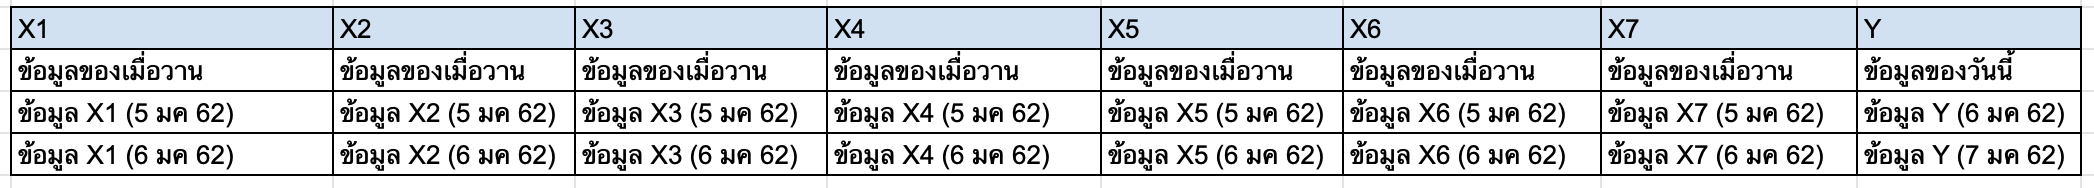



In [ ]:
#นำเข้าเดต้าที่สร้างได้
import pandas as pd
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
weather_data = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/Group6_2กาญจนสุดา_16วรรณนภา_21เกลิดา_31ศิริขวัญ.csv')

In [ ]:
weather_data

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...
8164,เลย,24,2,2021,1008.39,69,1,0,0,18.4,26.8,18.0
8165,เลย,25,2,2021,1006.05,61,1,0,0,17.3,27.8,19.5
8166,เลย,26,2,2021,1004.86,55,2,0,0,13.0,26.3,16.0
8167,เลย,27,2,2021,1005.76,56,1,2,0,13.8,25.2,15.3


In [ ]:
weather_data.shape

(8169, 12)

In [ ]:
weather_data.head(3)

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1


In [ ]:
data_features = weather_data.iloc[:,4:]
data_features

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,1007.49,86,3,10,3,22.9,25.6,22.1
3,1008.28,80,2,8,0,21.9,25.8,22.8
4,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...
8164,1008.39,69,1,0,0,18.4,26.8,18.0
8165,1006.05,61,1,0,0,17.3,27.8,19.5
8166,1004.86,55,2,0,0,13.0,26.3,16.0
8167,1005.76,56,1,2,0,13.8,25.2,15.3


In [ ]:
data_features[data_features.eq('-').any(1)] #ถ้าอันไหนเจอค่า eq เราจะดรอปทั้งหมด (เช็คทุกคอลัมน์) จะบอกว่าแถวไหน คอลัมน์มีค่าที่เราต้องการ
data_features[data_features['ความเร็วลม'].eq('-')] #เลือกเช็คแค่คอลัมน์ความเร็วลม
data_features_d = data_features[data_features.eq('-').any(1)==False] #ดรอปข้อมมูลที่มี - ออก
data_features_d = data_features_d[data_features_d.eq('T').any(1)==False] #ดรอปข้อมมูลที่มีค่า T ออก
data_features_d.dtypes
data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].astype(float)
data_features_d['จำนวนเมฆ'] = data_features_d['จำนวนเมฆ'].astype(float)
data_features_d['ปริมาณฝน'] = data_features_d['ปริมาณฝน'].astype(float)
data_features_d['อุณหภูมิต่ำสุด'] = data_features_d['อุณหภูมิต่ำสุด'].astype(float)
data_features_d['ความชื้นสัมพัทธ์'] = data_features_d['ความชื้นสัมพัทธ์'].astype(float)
data_features_d

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,1005.47,83.0,3.0,9.0,1.4,24.2,27.6,24.8
1,1006.65,92.0,2.0,10.0,17.7,24.0,25.6,23.0
2,1007.49,86.0,3.0,10.0,3.0,22.9,25.6,22.1
3,1008.28,80.0,2.0,8.0,0.0,21.9,25.8,22.8
4,1009.88,86.0,2.0,10.0,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...
8164,1008.39,69.0,1.0,0.0,0.0,18.4,26.8,18.0
8165,1006.05,61.0,1.0,0.0,0.0,17.3,27.8,19.5
8166,1004.86,55.0,2.0,0.0,0.0,13.0,26.3,16.0
8167,1005.76,56.0,1.0,2.0,0.0,13.8,25.2,15.3


In [ ]:
data_features_d.isnull().any()

ความกด                False
ความชื้นสัมพัทธ์      False
ความเร็วลม            False
จำนวนเมฆ              False
ปริมาณฝน              False
อุณหภูมิจุดน้ำค้าง    False
อุณหภูมิตุ้ม          False
อุณหภูมิต่ำสุด        False
pl                    False
dtype: bool

In [ ]:
data_features_d1 = data_features_d[['ความกด','ความเร็วลม','จำนวนเมฆ'	,'อุณหภูมิจุดน้ำค้าง'	,'อุณหภูมิตุ้ม'	,'อุณหภูมิต่ำสุด' ,'ความชื้นสัมพัทธ์']]
data_features_d1.head()

,ความกด,ความเร็วลม,จำนวนเมฆ,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด,ความชื้นสัมพัทธ์
0,1005.47,3.0,9.0,24.2,27.6,24.8,83.0
1,1006.65,2.0,10.0,24.0,25.6,23.0,92.0
2,1007.49,3.0,10.0,22.9,25.6,22.1,86.0
3,1008.28,2.0,8.0,21.9,25.8,22.8,80.0
4,1009.88,2.0,10.0,21.7,24.3,23.1,86.0


#อันนี้ที่เหมือนตารางที่อาจารย์ยกตัวอย่าง

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [ ]:
data_features_d1['ความชื้นสัมพัทธ์'] = data_features_d1['ความชื้นสัมพัทธ์'].shift(-1); #ดึงค่าใน index แรกของ array ออก เอา83.0 ออกไป
data_features_d1

<ipython-input-214-45f01d7001a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features_d1['ความชื้นสัมพัทธ์'] = data_features_d1['ความชื้นสัมพัทธ์'].shift(-1);


,ความกด,ความเร็วลม,จำนวนเมฆ,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด,ความชื้นสัมพัทธ์
0,1005.47,3.0,9.0,24.2,27.6,24.8,92.0
1,1006.65,2.0,10.0,24.0,25.6,23.0,86.0
2,1007.49,3.0,10.0,22.9,25.6,22.1,80.0
3,1008.28,2.0,8.0,21.9,25.8,22.8,86.0
4,1009.88,2.0,10.0,21.7,24.3,23.1,86.0
...,...,...,...,...,...,...,...
8164,1008.39,1.0,0.0,18.4,26.8,18.0,61.0
8165,1006.05,1.0,0.0,17.3,27.8,19.5,55.0
8166,1004.86,2.0,0.0,13.0,26.3,16.0,56.0
8167,1005.76,1.0,2.0,13.8,25.2,15.3,58.0


In [ ]:
data_features_d0 = data_features_d[['ความกด','ความเร็วลม','จำนวนเมฆ'	,'อุณหภูมิจุดน้ำค้าง'	,'อุณหภูมิตุ้ม'	,'อุณหภูมิต่ำสุด' ]]
data_features_d0.head()

,ความกด,ความเร็วลม,จำนวนเมฆ,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,1005.47,3.0,9.0,24.2,27.6,24.8
1,1006.65,2.0,10.0,24.0,25.6,23.0
2,1007.49,3.0,10.0,22.9,25.6,22.1
3,1008.28,2.0,8.0,21.9,25.8,22.8
4,1009.88,2.0,10.0,21.7,24.3,23.1


In [ ]:
data_features_d1.dtypes

ความกด                float64
ความเร็วลม            float64
จำนวนเมฆ              float64
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิตุ้ม          float64
อุณหภูมิต่ำสุด        float64
ความชื้นสัมพัทธ์      float64
dtype: object

#Normalization

In [ ]:
from sklearn import preprocessing
import numpy as np

In [ ]:
#define
scaler = preprocessing.StandardScaler() #ปรับมีนให้เหลือ0สแดนดาดเป็น1 ในวงเล็บสามารถใส่ค่าพารามิเตอร์ได้
#train
scaler.fit(data_features_d1) #สร้างโมเดลจาก data เอามา fit กับ dat
#predict-transform
#เอาโมเดลไปใช้งาน
data_features_d_s = scaler.transform(data_features_d1)

In [ ]:
data_features_d_s

array([[-2.29910857,  0.5914187 ,  2.28184617, ...,  0.95480871,
         1.47666181,  1.33170074],
       [-1.92549238, -0.23542385,  2.68279133, ...,  0.21958617,
         0.93047261,  2.28581221],
       [-1.65952832,  0.5914187 ,  2.68279133, ...,  0.21958617,
         0.65737801,  1.64973789],
       ...,
       [-2.49224914, -0.23542385, -1.32666027, ...,  0.47691406,
        -1.19359649, -1.63664607],
       [-2.20728764, -1.06226641, -0.52476995, ...,  0.07254167,
        -1.4060034 , -1.53063368],
       [-1.43155912, -1.06226641, -0.92571511, ...,  0.21958617,
        -1.19359649, -1.31860891]])

In [ ]:
display(data_features_d_s)

array([[-2.29910857,  0.5914187 ,  2.28184617, ...,  0.95480871,
         1.47666181,  1.33170074],
       [-1.92549238, -0.23542385,  2.68279133, ...,  0.21958617,
         0.93047261,  2.28581221],
       [-1.65952832,  0.5914187 ,  2.68279133, ...,  0.21958617,
         0.65737801,  1.64973789],
       ...,
       [-2.49224914, -0.23542385, -1.32666027, ...,  0.47691406,
        -1.19359649, -1.63664607],
       [-2.20728764, -1.06226641, -0.52476995, ...,  0.07254167,
        -1.4060034 , -1.53063368],
       [-1.43155912, -1.06226641, -0.92571511, ...,  0.21958617,
        -1.19359649, -1.31860891]])

##Normalization

In [ ]:
# copy the data
data_features_d1_max_scaled = data_features_d1.copy()
  
# apply normalization techniques
for column in data_features_d1_max_scaled.columns:
    data_features_d1_max_scaled[column].abs().max()
      
# view normalized data
display(data_features_d1_max_scaled)



,ความกด,ความเร็วลม,จำนวนเมฆ,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด,ความชื้นสัมพัทธ์
0,1005.47,3.0,9.0,24.2,27.6,24.8,83.0
1,1006.65,2.0,10.0,24.0,25.6,23.0,92.0
2,1007.49,3.0,10.0,22.9,25.6,22.1,86.0
3,1008.28,2.0,8.0,21.9,25.8,22.8,80.0
4,1009.88,2.0,10.0,21.7,24.3,23.1,86.0
...,...,...,...,...,...,...,...
8164,1008.39,1.0,0.0,18.4,26.8,18.0,69.0
8165,1006.05,1.0,0.0,17.3,27.8,19.5,61.0
8166,1004.86,2.0,0.0,13.0,26.3,16.0,55.0
8167,1005.76,1.0,2.0,13.8,25.2,15.3,56.0


In [ ]:
pi=data_features_d1_max_scaled[['ความชื้นสัมพัทธ์']]


In [ ]:
data_features_d2= pi.drop(0, axis=0)
data_features_d2.rename(columns={'ความชื้นสัมพัทธ์':'ความชื้นสัมพัทธ์(y)'},inplace=True)
data_features_d2

,ความชื้นสัมพัทธ์(y)
1,92.0
2,86.0
3,80.0
4,86.0
5,86.0
...,...
8164,69.0
8165,61.0
8166,55.0
8167,56.0


In [ ]:
all_h1 = pd.concat([data_features_d1_max_scaled,data_features_d2])
all_h1

,ความกด,ความเร็วลม,จำนวนเมฆ,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด,ความชื้นสัมพัทธ์,ความชื้นสัมพัทธ์(y)
0,1005.47,3.0,9.0,24.2,27.6,24.8,83.0,NaN
1,1006.65,2.0,10.0,24.0,25.6,23.0,92.0,NaN
2,1007.49,3.0,10.0,22.9,25.6,22.1,86.0,NaN
3,1008.28,2.0,8.0,21.9,25.8,22.8,80.0,NaN
4,1009.88,2.0,10.0,21.7,24.3,23.1,86.0,NaN
...,...,...,...,...,...,...,...,...
8164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0
8165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0
8166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0


In [ ]:
del all_h1['ความชื้นสัมพัทธ์']

In [ ]:
all_h1

,ความกด,ความเร็วลม,จำนวนเมฆ,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด,ความชื้นสัมพัทธ์(y)
0,1005.47,3.0,9.0,24.2,27.6,24.8,NaN
1,1006.65,2.0,10.0,24.0,25.6,23.0,NaN
2,1007.49,3.0,10.0,22.9,25.6,22.1,NaN
3,1008.28,2.0,8.0,21.9,25.8,22.8,NaN
4,1009.88,2.0,10.0,21.7,24.3,23.1,NaN
...,...,...,...,...,...,...,...
8164,NaN,NaN,NaN,NaN,NaN,NaN,69.0
8165,NaN,NaN,NaN,NaN,NaN,NaN,61.0
8166,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8167,NaN,NaN,NaN,NaN,NaN,NaN,56.0


In [ ]:
all_h2 = all_h1.dropna(subset=['ความกด',	'ความเร็วลม',	'จำนวนเมฆ',	'อุณหภูมิจุดน้ำค้าง',	'อุณหภูมิตุ้ม',	'อุณหภูมิต่ำสุด'])
all_h2.head()

,ความกด,ความเร็วลม,จำนวนเมฆ,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด,ความชื้นสัมพัทธ์(y)
0,1005.47,3.0,9.0,24.2,27.6,24.8,NaN
1,1006.65,2.0,10.0,24.0,25.6,23.0,NaN
2,1007.49,3.0,10.0,22.9,25.6,22.1,NaN
3,1008.28,2.0,8.0,21.9,25.8,22.8,NaN
4,1009.88,2.0,10.0,21.7,24.3,23.1,NaN


In [ ]:
all_h2.isnull().any()

ความกด                 False
ความเร็วลม             False
จำนวนเมฆ               False
อุณหภูมิจุดน้ำค้าง     False
อุณหภูมิตุ้ม           False
อุณหภูมิต่ำสุด         False
ความชื้นสัมพัทธ์(y)     True
dtype: bool

In [ ]:
all_h3 = all_h2.fillna({'ความชื้นสัมพัทธ์(y)':0})
all_h3

,ความกด,ความเร็วลม,จำนวนเมฆ,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด,ความชื้นสัมพัทธ์(y)
0,1005.47,3.0,9.0,24.2,27.6,24.8,0.0
1,1006.65,2.0,10.0,24.0,25.6,23.0,0.0
2,1007.49,3.0,10.0,22.9,25.6,22.1,0.0
3,1008.28,2.0,8.0,21.9,25.8,22.8,0.0
4,1009.88,2.0,10.0,21.7,24.3,23.1,0.0
...,...,...,...,...,...,...,...
8164,1008.39,1.0,0.0,18.4,26.8,18.0,0.0
8165,1006.05,1.0,0.0,17.3,27.8,19.5,0.0
8166,1004.86,2.0,0.0,13.0,26.3,16.0,0.0
8167,1005.76,1.0,2.0,13.8,25.2,15.3,0.0


In [ ]:
all_h3.isnull().any()

ความกด                 False
ความเร็วลม             False
จำนวนเมฆ               False
อุณหภูมิจุดน้ำค้าง     False
อุณหภูมิตุ้ม           False
อุณหภูมิต่ำสุด         False
ความชื้นสัมพัทธ์(y)    False
dtype: bool

In [ ]:
all_h3.shape

(5061, 7)

##ทำนาย

In [ ]:
data = data_features_d[['ความกด'	,'ความเร็วลม',	'จำนวนเมฆ'	,'ปริมาณฝน',	'อุณหภูมิจุดน้ำค้าง',	'อุณหภูมิตุ้ม','อุณหภูมิต่ำสุด']]
data

,ความกด,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,1005.47,3.0,9.0,1.4,24.2,27.6,24.8
1,1006.65,2.0,10.0,17.7,24.0,25.6,23.0
2,1007.49,3.0,10.0,3.0,22.9,25.6,22.1
3,1008.28,2.0,8.0,0.0,21.9,25.8,22.8
4,1009.88,2.0,10.0,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...
8164,1008.39,1.0,0.0,0.0,18.4,26.8,18.0
8165,1006.05,1.0,0.0,0.0,17.3,27.8,19.5
8166,1004.86,2.0,0.0,0.0,13.0,26.3,16.0
8167,1005.76,1.0,2.0,0.0,13.8,25.2,15.3


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
predictors = ['ความกด', 'ความเร็วลม','จำนวนเมฆ','ปริมาณฝน','อุณหภูมิจุดน้ำค้าง','อุณหภูมิตุ้ม','อุณหภูมิต่ำสุด']
x = data_features_d[predictors]
y = data_features_d['ความชื้นสัมพัทธ์']

In [ ]:
#define 
scaler = LinearRegression()
#fit
model =scaler.fit(x, y)
#predict
y_pred = model.predict(x)
y_pred

array([83.06209854, 91.43268501, 85.91511497, ..., 47.97552635,
       55.97920114, 58.89664267])

In [ ]:
predict_y = pd.DataFrame(y_pred)
predict_y = pd.DataFrame(y_pred, columns=['ทำนายความชื้นสัมพัทธ์(Y)'])
predict_y

,ทำนายความชื้นสัมพัทธ์(Y)
0,83.062099
1,91.432685
2,85.915115
3,81.527772
4,86.162082
...,...
5056,65.817002
5057,58.208102
5058,47.975526
5059,55.979201


In [ ]:
a = pd.concat([data,predict_y] , axis=1)
a

,ความกด,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด,ทำนายความชื้นสัมพัทธ์(Y)
0,1005.47,3.0,9.0,1.4,24.2,27.6,24.8,83.062099
1,1006.65,2.0,10.0,17.7,24.0,25.6,23.0,91.432685
2,1007.49,3.0,10.0,3.0,22.9,25.6,22.1,85.915115
3,1008.28,2.0,8.0,0.0,21.9,25.8,22.8,81.527772
4,1009.88,2.0,10.0,2.2,21.7,24.3,23.1,86.162082
...,...,...,...,...,...,...,...,...
8164,1008.39,1.0,0.0,0.0,18.4,26.8,18.0,NaN
8165,1006.05,1.0,0.0,0.0,17.3,27.8,19.5,NaN
8166,1004.86,2.0,0.0,0.0,13.0,26.3,16.0,NaN
8167,1005.76,1.0,2.0,0.0,13.8,25.2,15.3,NaN


In [ ]:
FN=a.dropna(subset=['ความกด',	'ความเร็วลม',	'จำนวนเมฆ',	'ปริมาณฝน',	'อุณหภูมิจุดน้ำค้าง',	'อุณหภูมิตุ้ม',	'อุณหภูมิต่ำสุด',	'ทำนายความชื้นสัมพัทธ์(Y)'])

In [ ]:
FN

,ความกด,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด,ทำนายความชื้นสัมพัทธ์(Y)
0,1005.47,3.0,9.0,1.4,24.2,27.6,24.8,83.062099
1,1006.65,2.0,10.0,17.7,24.0,25.6,23.0,91.432685
2,1007.49,3.0,10.0,3.0,22.9,25.6,22.1,85.915115
3,1008.28,2.0,8.0,0.0,21.9,25.8,22.8,81.527772
4,1009.88,2.0,10.0,2.2,21.7,24.3,23.1,86.162082
...,...,...,...,...,...,...,...,...
5056,1013.57,2.0,2.0,0.0,14.6,21.9,15.5,65.817002
5057,1013.68,2.0,7.0,0.0,15.6,23.2,17.2,58.208102
5058,1012.72,2.0,5.0,0.0,17.7,24.7,18.8,47.975526
5059,1012.44,2.0,5.0,0.0,19.0,24.9,20.8,55.979201
